# Data Science Bowl 2018

Find cell nuclei in microscope images

https://www.kaggle.com/c/data-science-bowl-2018/data

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [54]:
from evaluations.iou import log_iou, iou_loss
import plot_helpers.plot as plot
import data_loaders

import numpy as np
from scipy.ndimage import label
import matplotlib.pyplot as plt

# Testing IOU


In [5]:
summary_masks_raw, weights_raw = data_loaders.masks_and_weights("one_and_two_term_weights")

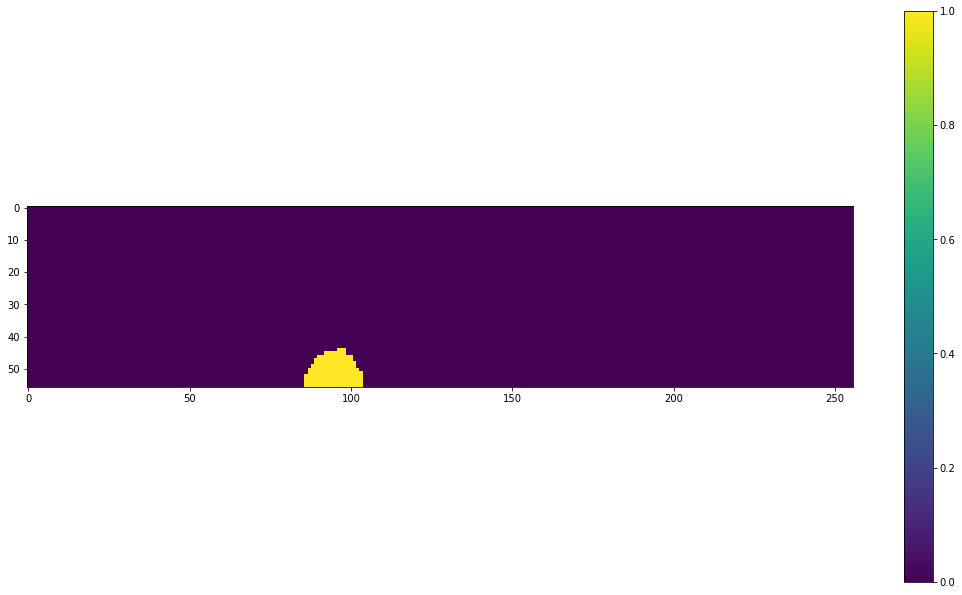

In [7]:
plot.imshow(summary_masks_raw[1][200:,:])

In [26]:
offset = 1
true = summary_masks_raw[1][200:,:]
pred = true[offset:, offset:]
pred = np.pad(pred, ((0, offset), (0, offset)), mode="constant")

In [27]:
"""
plot.imshow(true)
plot.imshow(pred)
"""

'\nplot.imshow(true)\nplot.imshow(pred)\n'

In [28]:
log_iou(pred, true)
print(iou_loss(pred, true))

Thresh	TP	FP	FN	Prec.
0.500	1	0	0	1.000
0.550	1	0	0	1.000
0.600	1	0	0	1.000
0.650	1	0	0	1.000
0.700	1	0	0	1.000
0.750	0	1	1	0.000
0.800	0	1	1	0.000
0.850	0	1	1	0.000
0.900	0	1	1	0.000
0.950	0	1	1	0.000
AP	-	-	-	0.500
0.5


# What's up with the different scales

In [29]:
summary_masks_raw, _ = data_loaders.masks_and_weights("one_and_two_term_weights")

In [64]:
shapes = {}

for i in range(len(summary_masks_raw)):

    labelled, num_features = label(summary_masks_raw[i])
    shp = labelled.shape
    f_labelled = labelled.flatten()
    sizes = []
    
    for i in range(1, num_features+1):
        sizes.append(np.count_nonzero(f_labelled == i))
    
    try:
        shapes[shp]["sizes"].append(sizes)
        shapes[shp]["images"].append(labelled)

    except KeyError:
        shapes[shp] = {
            "sizes": [sizes],
            "images": [labelled],
        }



In [66]:
for shp in shapes:
    print(shp, len(shapes[shp]["sizes"]))

(256, 256) 334
(603, 1272) 6
(520, 696) 92
(256, 320) 112
(360, 360) 91
(260, 347) 5
(512, 640) 13
(1024, 1024) 16
(1040, 1388) 1


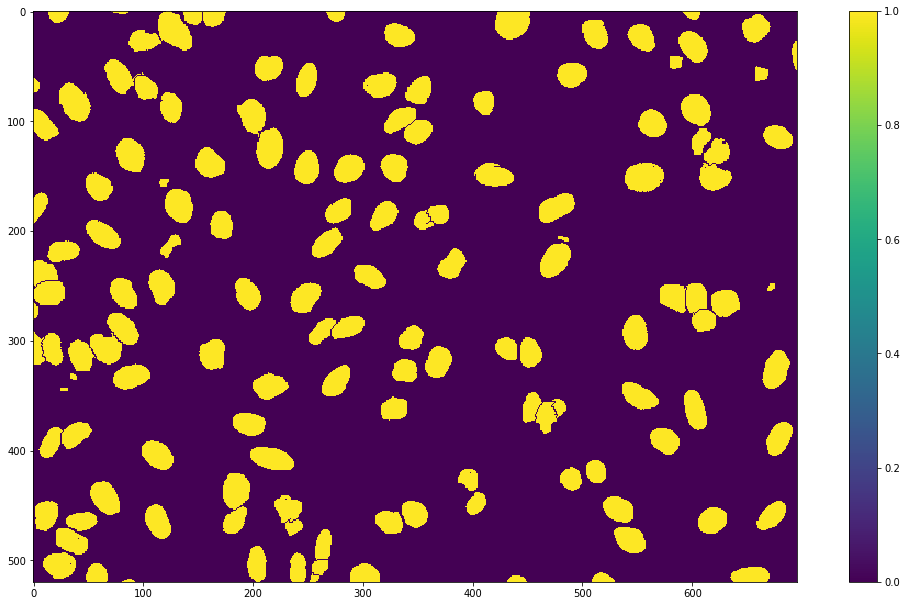

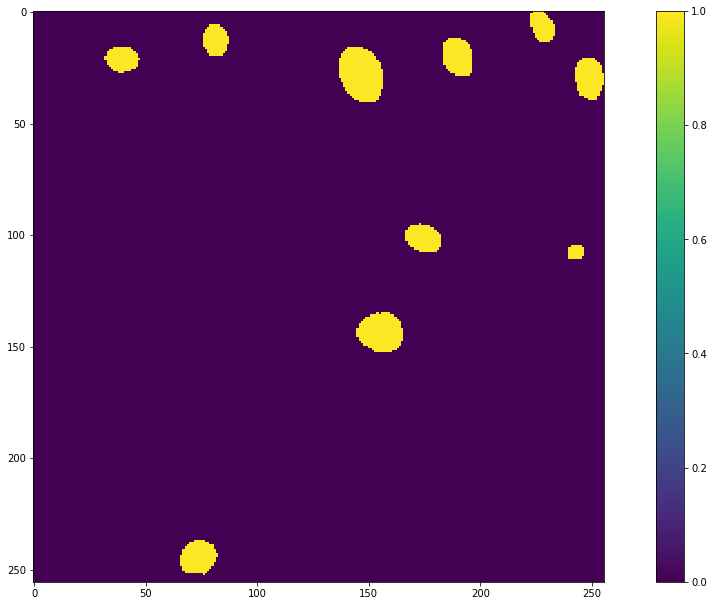

In [52]:
plot.imshow(summary_masks_raw[100])
plot.imshow(summary_masks_raw[0])

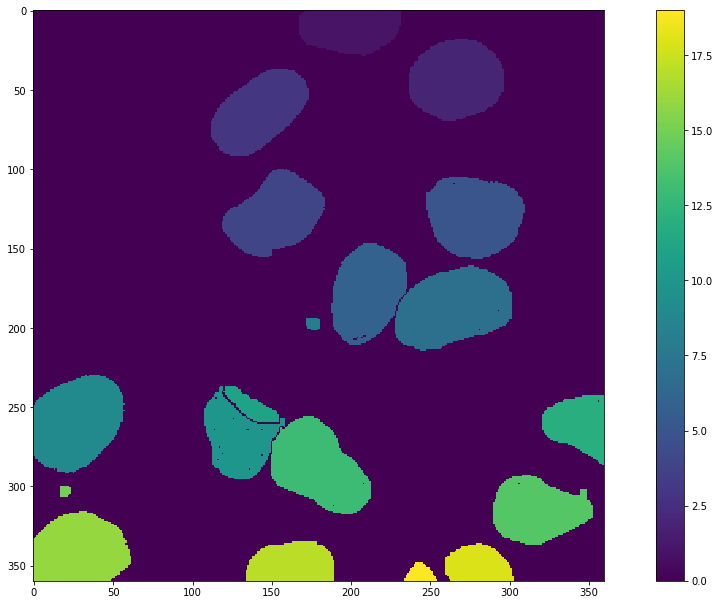

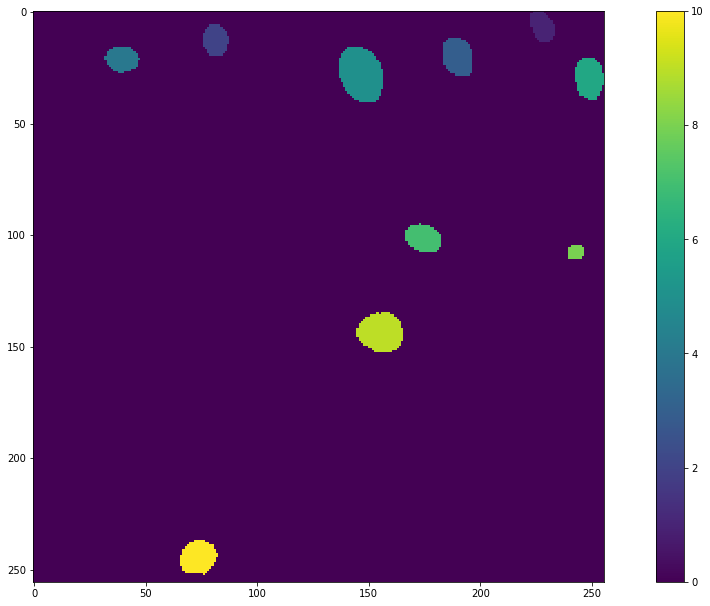

In [72]:
plot.imshow(shapes[(360, 360)]["images"][5])
plot.imshow(shapes[(256, 256)]["images"][0])

dict_keys([(256, 256), (603, 1272), (520, 696), (256, 320), (360, 360), (260, 347), (512, 640), (1024, 1024), (1040, 1388)])
2
28.94610778443114
172.85881257757552
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 6, 6, 7, 7, 8, 8, 9, 9, 11, 11, 11, 11, 12, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 

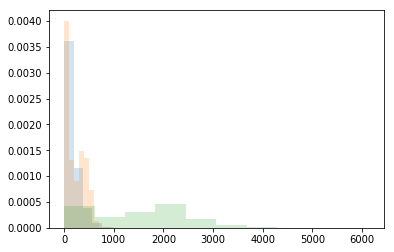

In [76]:
print(shapes.keys())
print(len(shapes[(256, 256)]))

for shp in [ (256, 256), (1024, 1024), (360, 360) ]:
    lens, sizes = [], []
    images = shapes[shp]
    for img in images["sizes"]:
        lens.append(len(img))
        sizes.extend(img)
    print(np.mean(lens))
    print(np.mean(sizes))
    #plt.plot(lens)
    plt.hist(sizes, density=True, alpha=0.2)
    print(sorted(sizes))